In [1]:
import numpy as np
import  pandas as pd
import  csv
import matplotlib.pyplot as plt

In [2]:

type = []
lat = []
lon = []
floorSize = []
floorSizeRefine = []
numberOfRooms = []
numberOfBathroom = []
amount = []

In [6]:
#Read CSV file from the api and sanitize them like null value and different comma seperated int
with open('ml_dataset.csv', mode = 'r') as file:
        csvFile = csv.reader(file)

        rowCount = 0
        for lines in csvFile:
            #if(rowCount>100):break
            if(rowCount > 0):
                type.append(int(lines[0]))
                lat.append(float(lines[1]))
                lon.append(float(lines[2]))

                floorSizeNumber = ''

                for j in range (len(lines[3])):
                    if(lines[3][j] != ','):
                        floorSizeNumber += lines[3][j]

                #floorSize.append(int(floorSizeNumber))
                floorSizeRefine.append(int(floorSizeNumber))
                numberOfRooms.append(int(lines[4]))
                numberOfBathroom.append(int(lines[5]))
                amount.append(int(lines[6]))
            rowCount+=1

a = np.array(type)
b = np.array(lat)
c = np.array(lon)
d = np.array(numberOfRooms)
e = np.array(numberOfBathroom)
f = np.array(floorSizeRefine)
g = np.array(amount)

In [7]:
#Write them on a diffrent Csv
df = pd.DataFrame({'Type': a,'Lat': b,'Lon': c,'Floor Size(SQFT)': f,'Number of Rooms': d,'Number of Bathroom': e,'Amount(BDT)': g})
#df = pd.DataFrame({'Type': a,'Floor Size(SQFT)': f,'Number of Rooms': d,'Number of Bathroom': e,'Amount(BDT)': g})
df.to_csv("processed_ml_dataset.csv", index=False)

In [ ]:
#Read Processed CSV and add cluster label
df = pd.read_csv('processed_ml_dataset.csv')
#print('Dimension of dataset= ', df.shape)
df.head()
from sklearn.cluster import KMeans
df.dropna(axis=0, how='any', subset=['Lat', 'Lon'], inplace=True)
# Variable with the Longitude and Latitude
X = df.loc[:, ['Type', 'Lat', 'Lon']]
#print(X.head(10))
kmeans = KMeans(n_clusters=10, max_iter=1000, init='k-means++')
lat_long = df.values[:, 1:3]
kmeans.fit(lat_long)  # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(lat_long)
centers = kmeans.cluster_centers_  # Coordinates of cluster centers.
labels = kmeans.predict(lat_long)  # Labels of each point
cluster = kmeans.fit_predict(lat_long)
#print(cluster)

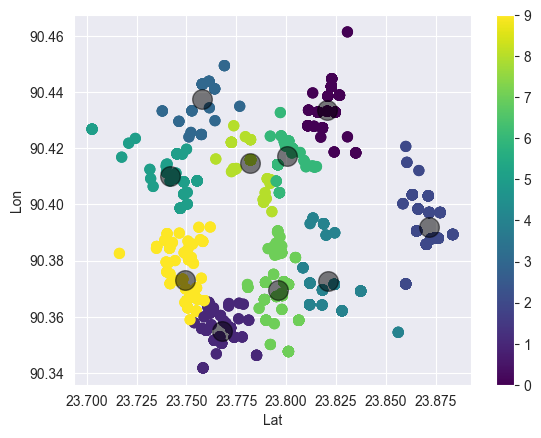

In [13]:
X.plot.scatter(x = 'Lat', y = 'Lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
df = pd.DataFrame({'Type': a, 'Floor Size(SQFT)': f, 'Number of Rooms': d, 'Number of Bathroom': e, 'Cluster Label': cluster,'Amount(BDT)': g})
df.to_csv("final_processed_ml_dataset.csv", index=False)
print('dataset save successfully')